In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

/tmp/ipykernel_4019/2756096847.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('accident.csv')
df.head()

,Date,Time,Weather,Road_Type,Number_of_Vehicles,Severity
0,2024-04-01,08:00,Sunny,Highway,2,Minor
1,2024-04-02,13:30,Rainy,City Street,1,Major
2,2024-04-03,17:45,Foggy,Rural Road,3,Major
3,2024-04-04,09:15,Sunny,Highway,2,Minor
4,2024-04-05,16:20,Cloudy,City Street,1,Minor


In [4]:
x = df['Number_of_Vehicles']

km = KMeans(n_clusters=3)
prediction = km.fit_predict(df[['Number_of_Vehicles']])
prediction


array([0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2],
      dtype=int32)

In [5]:
df['cluster'] = prediction
df.head()

,Date,Time,Weather,Road_Type,Number_of_Vehicles,Severity,cluster
0,2024-04-01,08:00,Sunny,Highway,2,Minor,0
1,2024-04-02,13:30,Rainy,City Street,1,Major,2
2,2024-04-03,17:45,Foggy,Rural Road,3,Major,0
3,2024-04-04,09:15,Sunny,Highway,2,Minor,0
4,2024-04-05,16:20,Cloudy,City Street,1,Minor,2


In [9]:
cluster_names = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3'
}
# Map cluster labels to cluster names
df['Cluster_Name'] = df['cluster'].map(cluster_names)

df.head()

,Date,Time,Weather,Road_Type,Number_of_Vehicles,Severity,cluster,Cluster_Name
0,2024-04-01,08:00,Sunny,Highway,2,Minor,0,Cluster 1
1,2024-04-02,13:30,Rainy,City Street,1,Major,2,Cluster 3
2,2024-04-03,17:45,Foggy,Rural Road,3,Major,0,Cluster 1
3,2024-04-04,09:15,Sunny,Highway,2,Minor,0,Cluster 1
4,2024-04-05,16:20,Cloudy,City Street,1,Minor,2,Cluster 3


/home/abhijith/.local/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/abhijith/.local/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/abhijith/.local/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/abhijith/.local/lib/python3.10/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/abhiji

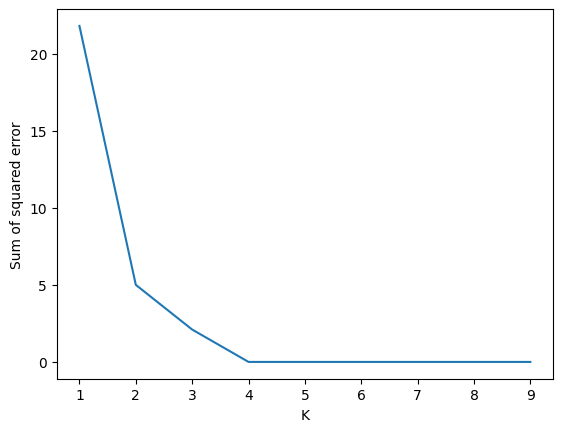

In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Number_of_Vehicles']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)